In [ ]:
# HMM
import pandas as pd
import numpy as np
#!pip install yfinance
#import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('rut.xlsx')
df.index = pd.to_datetime(df.index)
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Return,segment,Labels
1970-01-01 00:00:00.000000000,0,2017-01-06,1372.489990,1375.060059,1366.819946,1367.280029,1367.280029,3339890000,0.001311,0,Sabit
1970-01-01 00:00:00.000000001,1,2017-01-09,1367.130005,1367.130005,1356.540039,1357.489990,1357.489990,3217610000,-0.021946,2,Azalan Trend
1970-01-01 00:00:00.000000002,2,2017-01-10,1357.739990,1371.500000,1357.739990,1370.900024,1370.900024,3638790000,-0.000758,0,Sabit
1970-01-01 00:00:00.000000003,3,2017-01-11,1370.890015,1375.540039,1365.140015,1373.300049,1373.300049,3620410000,0.004403,0,Sabit
1970-01-01 00:00:00.000000004,4,2017-01-12,1372.839966,1372.839966,1346.810059,1361.069946,1361.069946,3462130000,0.002637,0,Sabit
...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000001251,1251,2021-12-27,2242.479980,2261.889893,2230.330078,2261.459961,2261.459961,2264120000,0.026560,3,Artan Trend
1970-01-01 00:00:00.000001252,1252,2021-12-28,2261.040039,2274.540039,2245.570068,2246.510010,2246.510010,2217050000,0.011076,3,Artan Trend
1970-01-01 00:00:00.000001253,1253,2021-12-29,2246.350098,2252.790039,2236.649902,2249.239990,2249.239990,2369370000,0.003417,0,Sabit
1970-01-01 00:00:00.000001254,1254,2021-12-30,2249.350098,2271.820068,2247.469971,2248.790039,2248.790039,2390990000,-0.005603,0,Sabit


In [ ]:
# Calculate return by using the percentage of adj close price 
df['Return5'] = df['Adj Close'].pct_change(periods=5)
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Return,segment,Labels,Return5
1970-01-01 00:00:00.000000000,0,2017-01-06,1372.489990,1375.060059,1366.819946,1367.280029,1367.280029,3339890000,0.001311,0,Sabit,NaN
1970-01-01 00:00:00.000000001,1,2017-01-09,1367.130005,1367.130005,1356.540039,1357.489990,1357.489990,3217610000,-0.021946,2,Azalan Trend,NaN
1970-01-01 00:00:00.000000002,2,2017-01-10,1357.739990,1371.500000,1357.739990,1370.900024,1370.900024,3638790000,-0.000758,0,Sabit,NaN
1970-01-01 00:00:00.000000003,3,2017-01-11,1370.890015,1375.540039,1365.140015,1373.300049,1373.300049,3620410000,0.004403,0,Sabit,NaN
1970-01-01 00:00:00.000000004,4,2017-01-12,1372.839966,1372.839966,1346.810059,1361.069946,1361.069946,3462130000,0.002637,0,Sabit,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000001251,1251,2021-12-27,2242.479980,2261.889893,2230.330078,2261.459961,2261.459961,2264120000,0.026560,3,Artan Trend,0.040264
1970-01-01 00:00:00.000001252,1252,2021-12-28,2261.040039,2274.540039,2245.570068,2246.510010,2246.510010,2217050000,0.011076,3,Artan Trend,0.049835
1970-01-01 00:00:00.000001253,1253,2021-12-29,2246.350098,2252.790039,2236.649902,2249.239990,2249.239990,2369370000,0.003417,0,Sabit,0.021013
1970-01-01 00:00:00.000001254,1254,2021-12-30,2249.350098,2271.820068,2247.469971,2248.790039,2248.790039,2390990000,-0.005603,0,Sabit,0.012102


In [ ]:
# Select data from 2003-01-02 to 2021-12-30
df = df.loc['2017-01-06':'2022-03-01']
df

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-01-06,1372.489990,1375.060059,1366.819946,1367.280029,1367.280029,3339890000,0.001311
2017-01-09,1367.130005,1367.130005,1356.540039,1357.489990,1357.489990,3217610000,-0.021946
2017-01-10,1357.739990,1371.500000,1357.739990,1370.900024,1370.900024,3638790000,-0.000758
2017-01-11,1370.890015,1375.540039,1365.140015,1373.300049,1373.300049,3620410000,0.004403
2017-01-12,1372.839966,1372.839966,1346.810059,1361.069946,1361.069946,3462130000,0.002637
...,...,...,...,...,...,...,...
2021-12-27,2242.479980,2261.889893,2230.330078,2261.459961,2261.459961,2264120000,0.026560
2021-12-28,2261.040039,2274.540039,2245.570068,2246.510010,2246.510010,2217050000,0.011076
2021-12-29,2246.350098,2252.790039,2236.649902,2249.239990,2249.239990,2369370000,0.003417


Text(0, 0.5, 'Close Price')

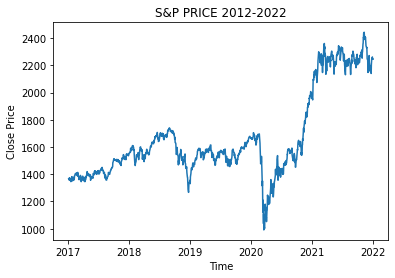

In [ ]:
# Plot Nasdaq adj close price from 2012 to 2022
plt.plot(df['Adj Close'])
plt.title('S&P PRICE 2012-2022')
plt.xlabel('Time')
plt.ylabel('Close Price')

Text(0, 0.5, 'Return')

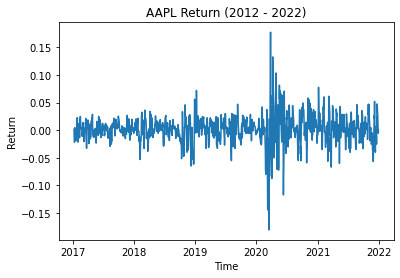

In [ ]:
# Plot Russell 3000 return from 2012 to 2022
plt.plot(df['Return'])
plt.title('AAPL Return (2012 - 2022)')
plt.xlabel('Time')
plt.ylabel('Return')

In [ ]:
df_new = df.reset_index(inplace=True, drop=False)
df_new = pd.DataFrame(df['Return'])
df_new

,Return
0,0.001311
1,-0.021946
2,-0.000758
3,0.004403
4,0.002637
...,...
1251,0.026560
1252,0.011076
1253,0.003417
1254,-0.005603


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_) 

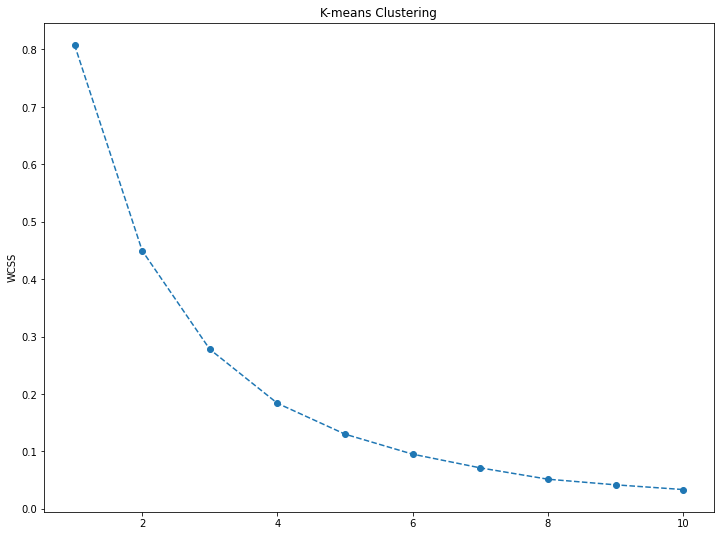

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [ ]:
kmeans.fit(df_new)

KMeans(n_clusters=5, random_state=42)

In [ ]:
data_kmeans = df.copy()
data_kmeans['segment'] = kmeans.labels_

In [ ]:
data_kmeans

,Date,Open,High,Low,Close,Adj Close,Volume,Return,segment
0,2017-01-06,1372.489990,1375.060059,1366.819946,1367.280029,1367.280029,3339890000,0.001311,0
1,2017-01-09,1367.130005,1367.130005,1356.540039,1357.489990,1357.489990,3217610000,-0.021946,2
2,2017-01-10,1357.739990,1371.500000,1357.739990,1370.900024,1370.900024,3638790000,-0.000758,0
3,2017-01-11,1370.890015,1375.540039,1365.140015,1373.300049,1373.300049,3620410000,0.004403,0
4,2017-01-12,1372.839966,1372.839966,1346.810059,1361.069946,1361.069946,3462130000,0.002637,0
...,...,...,...,...,...,...,...,...,...
1251,2021-12-27,2242.479980,2261.889893,2230.330078,2261.459961,2261.459961,2264120000,0.026560,3
1252,2021-12-28,2261.040039,2274.540039,2245.570068,2246.510010,2246.510010,2217050000,0.011076,3
1253,2021-12-29,2246.350098,2252.790039,2236.649902,2249.239990,2249.239990,2369370000,0.003417,0
1254,2021-12-30,2249.350098,2271.820068,2247.469971,2248.790039,2248.790039,2390990000,-0.005603,0


In [ ]:
data_kmeans_analysis = data_kmeans.groupby('segment').mean()
data_kmeans_analysis

,Open,High,Low,Close,Adj Close,Volume,Return
segment,,,,,,,
0,1669.350998,1678.494106,1657.599488,1668.169323,1668.169323,3.593376e+09,-0.002783
1,1661.160789,1694.899683,1654.357662,1685.711100,1685.711100,5.148248e+09,0.056167
2,1679.794911,1688.249443,1649.211551,1661.099888,1661.099888,4.260251e+09,-0.030076
3,1669.658473,1685.413691,1663.567196,1678.953943,1678.953943,3.728440e+09,0.018105
4,1310.293747,1322.059990,1243.383125,1263.741886,1263.741886,7.127265e+09,-0.106616


In [ ]:
data_kmeans['Labels'] = data_kmeans['segment'].map({0:'Sabit',
                         1:'Hızlı Artan Trend',
                         2:'Azalan Trend',
                         3:'Artan Trend',
                         4:'Hızlı Azalan Trend'})

Text(0, 0.5, 'Return')

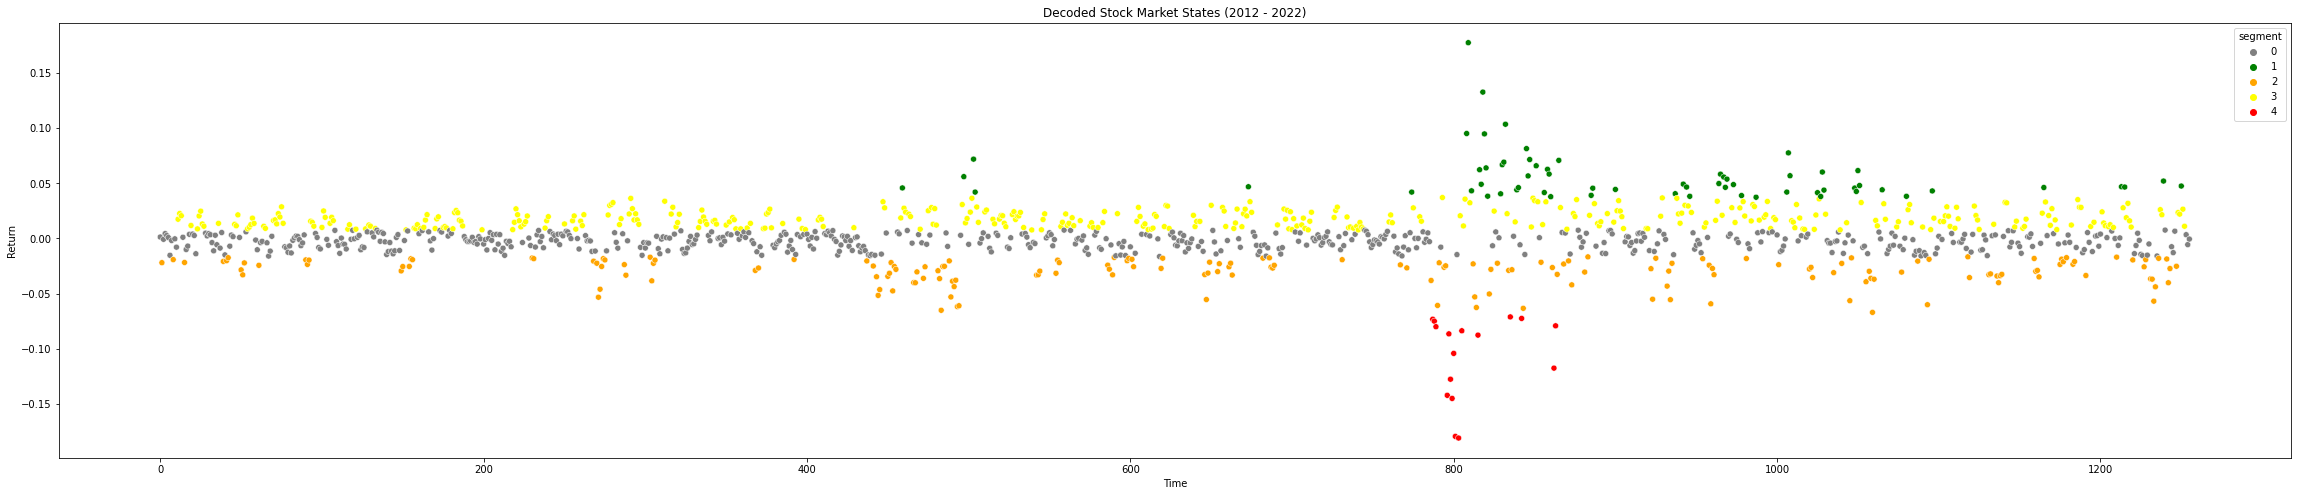

In [ ]:
# Plot decoded states from 2003 to 2021
colors = {0:'gray', 1:'green', 2:'orange', 3:'yellow', 4:'red'}
plt.figure(figsize = (40,8))
sns.scatterplot(x = data_kmeans.index, y = data_kmeans['Return'], palette=colors, hue = data_kmeans['segment'])
plt.title('Decoded Stock Market States (2012 - 2022)')
plt.xlabel('Time')
plt.ylabel('Return')

Text(0, 0.5, 'Adj Close')

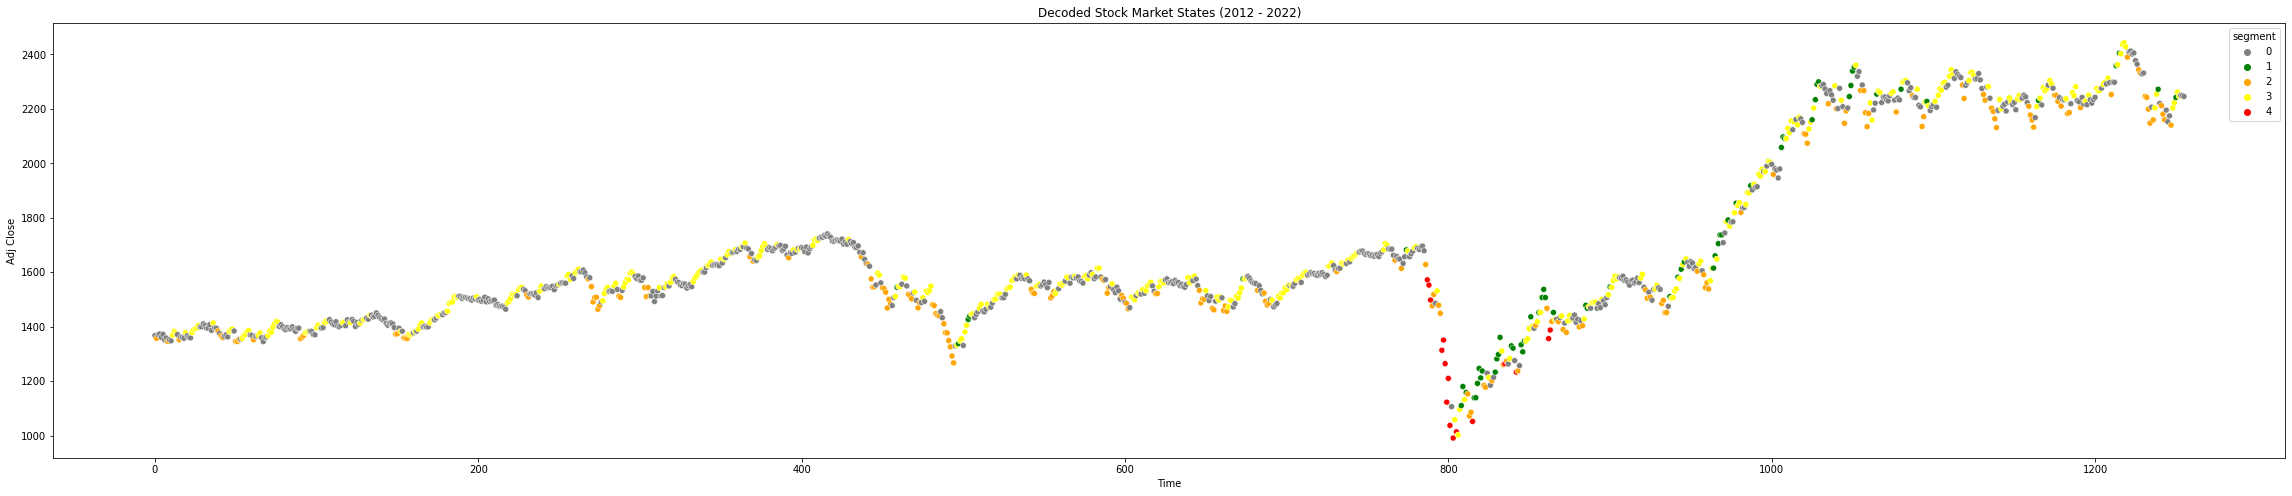

In [ ]:
# Plot decoded states from 2003 to 2021
colors = {0:'gray', 1:'green', 2:'orange', 3:'yellow', 4:'red'}
plt.figure(figsize = (40,8))
sns.scatterplot(x = data_kmeans.index, y = data_kmeans['Adj Close'], palette=colors, hue = data_kmeans['segment'])
plt.title('Decoded Stock Market States (2012 - 2022)')
plt.xlabel('Time')
plt.ylabel('Adj Close')

In [ ]:
df.to_excel('rut12.xlsx', index = True)